# Motorbike Ambulance Calls Analysis

In [12]:
# from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [13]:
data_path = './motorbike_ambulance_calls.csv'

data = pd.read_csv(data_path, index_col=0)

In [14]:
data.season.unique()

array(['spring', 'summer', 'autumn', 'winter'], dtype=object)

In [15]:
print(f'Data shape {data.shape}')
print(f'Data contains Nans\n{np.sum(data.isna())}')
data.head()

Data shape (17379, 14)
Data contains Nans
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
index,,,,,,,,,,,,,,
1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


### Encode columns with non-numeric data

In [16]:
season_encoder = LabelEncoder()
season_encoder.fit(data.season)
data['season'] = season_encoder.transform(data.season)

data.head()

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
index,,,,,,,,,,,,,,
1,1/1/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,1/1/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,1/1/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,1/1/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,1/1/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


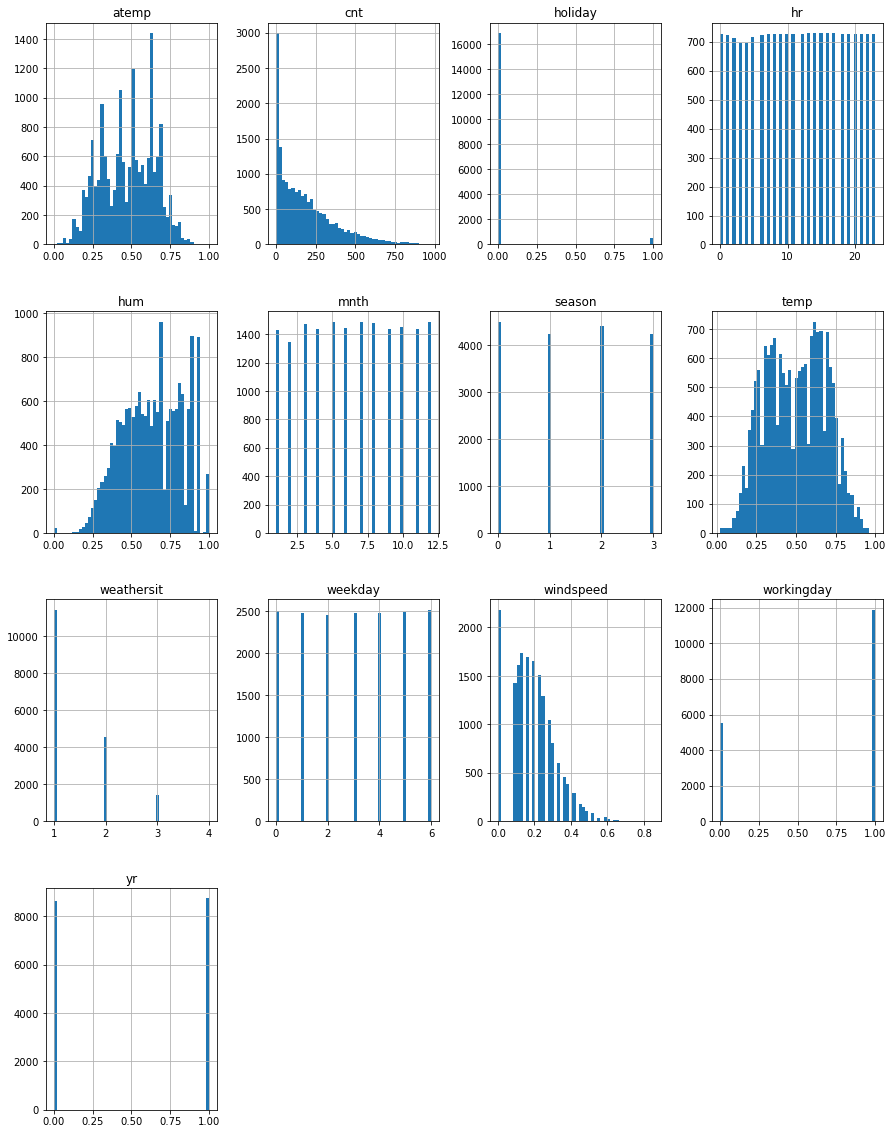

In [60]:
data.hist(bins=50, figsize=(15, 20))
plt.savefig('./feature_hist.png', bbox_inches='tight')
plt.show()

In [17]:
corr_matrix = data.corr()
corr_matrix.to_csv('./corr_matrix.csv')
corr_matrix['cnt'].abs().sort_values(ascending=False)

cnt           1.000000
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
yr            0.250495
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
season        0.013157
Name: cnt, dtype: float64

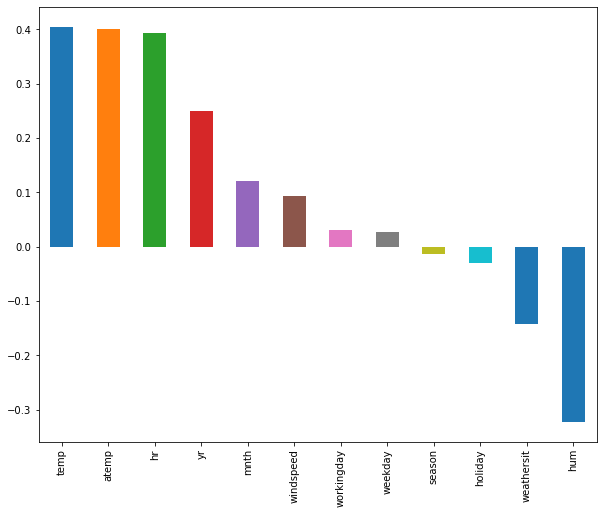

In [162]:
corr_matrix['cnt'].sort_values(ascending=False).drop(['cnt']).plot(kind='bar',figsize=(10, 8))
plt.savefig('./corr_cnt.pdf')
plt.show()

In [63]:
corr_matrix['cnt'].sort_values(ascending=False)

cnt           1.000000
temp          0.404772
atemp         0.400929
hr            0.394071
yr            0.250495
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
season       -0.013157
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [18]:
corr_matrix['temp']

yr            0.040913
mnth          0.201691
hr            0.137603
holiday      -0.027340
weekday      -0.001795
workingday    0.055390
weathersit   -0.102640
temp          1.000000
atemp         0.987672
hum          -0.069881
windspeed    -0.023125
cnt           0.404772
Name: temp, dtype: float64

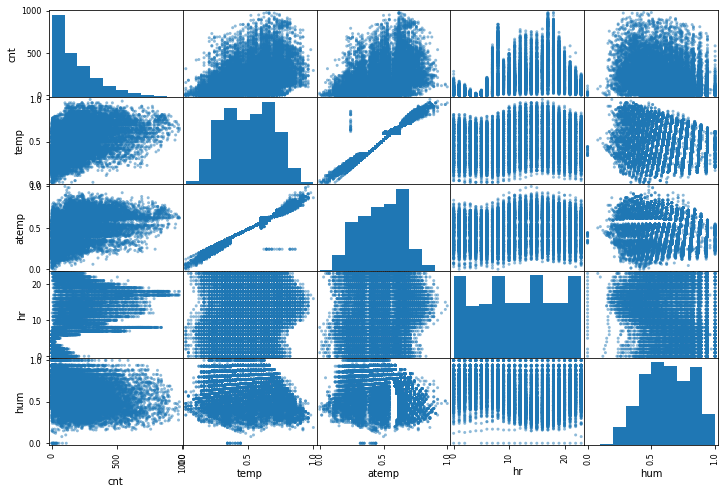

In [36]:
# let's select the most correlated attributes and check how they relate to each other
from pandas.plotting import scatter_matrix

attributes = [
    'cnt',
    'temp',
    'atemp',
    'hr',
    'hum'
]

scatter_matrix(data[attributes], figsize=(12, 8))
plt.savefig('./scatter_matrix.png')
plt.show()

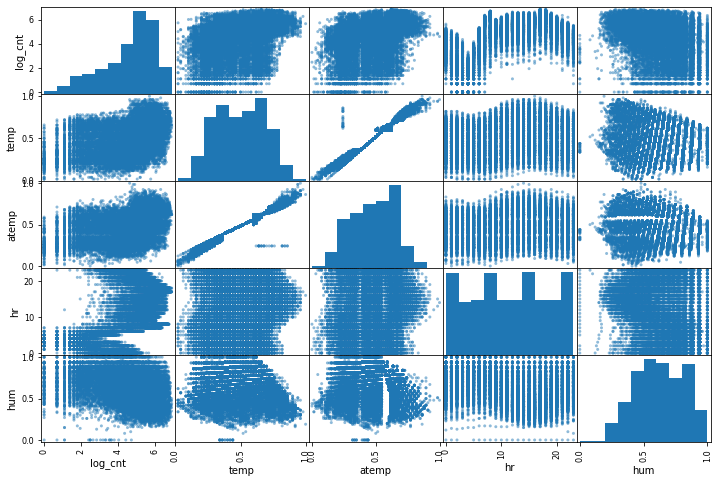

In [20]:
# out of curiosity let see how log(cnt) will be related to the data
from pandas.plotting import scatter_matrix

data['log_cnt'] = np.log(data['cnt'])

attributes = [
    'log_cnt',
    'temp',
    'atemp',
    'hr',
    'hum'
]

scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

In [21]:
corr_matrix = data.corr()
corr_matrix['log_cnt'].abs().sort_values(ascending=False)

log_cnt       1.000000
cnt           0.806352
hr            0.563126
temp          0.385724
atemp         0.382619
hum           0.335751
yr            0.165782
weathersit    0.119842
mnth          0.115297
windspeed     0.113496
weekday       0.029637
holiday       0.024935
workingday    0.001463
Name: log_cnt, dtype: float64

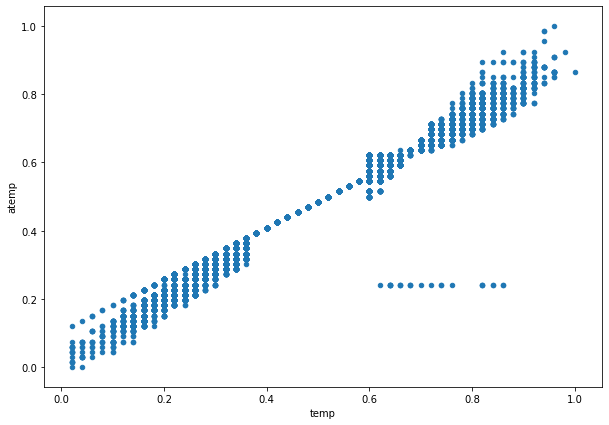

In [22]:
data.plot(kind='scatter', x='temp', y='atemp', figsize=(10, 7))
plt.show()

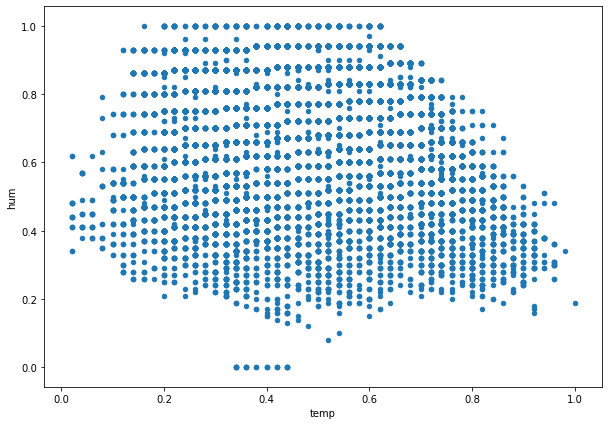

In [23]:
data.plot(kind='scatter', x='temp', y='hum', figsize=(10, 7))
plt.show()

In [24]:
categorical_vars = [
    'holiday',
#     'hr',
#     'mnth',
    'weathersit',
    'weekday',
    'workingday',
    'yr'
]

numerical_vars = [
    'atemp',
    'hum',
    'temp',
    'windspeed'
]

# predict number of calls - regression task
# accuracy measure - MAE
# ML current page - 1514


## Null hypothesis testing

In [11]:
import statsmodels.api as sm

data_path = './motorbike_ambulance_calls.csv'

data = pd.read_csv(data_path, index_col=0)

season_encoder = LabelEncoder()
season_encoder.fit(data.season)
data['season'] = season_encoder.transform(data.season)

# X = data.drop(['cnt', 'date'], axis=1)
X = data.loc[:, ['temp', 'atemp', 'hum', 'windspeed', 'hr', 'mnth', 'weekday']]
y = data.loc[:, ['cnt']]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     1250.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:10:28   Log-Likelihood:            -1.1150e+05
No. Observations:               17379   AIC:                         2.230e+05
Df Residuals:                   17371   BIC:                         2.231e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.6711      6.938      5.286      0.0

## Regression (log_cnt)

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import (cross_val_predict, cross_val_score,
                                     train_test_split, GridSearchCV)
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from motobike_transformers import FeatureSelector, CategoricalTransformer


data_path = './motorbike_ambulance_calls.csv'
target_col = 'log_cnt'
rnd_state = 42
cv = 5

data = pd.read_csv(data_path, index_col=0)
data['log_cnt'] = np.log(data['cnt'])

num_features = [
    'temp',
    'hr',
    'hum'
]
cat_features = [
    'weathersit',
]
cat_values = [
    [1, 2, 3, 4]
]

num_pipeline = Pipeline([
    ('fs', FeatureSelector(features=num_features)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('fs', FeatureSelector(features=cat_features)),
    ('ct', CategoricalTransformer(categories=cat_values))
])

data_pipeline = FeatureUnion([
    ('num', num_pipeline),
    ('cat', cat_pipeline)
])

y = data[target_col]
X = data.drop(target_col, axis=1)

regressors = [
    ('Ridge', Ridge(random_state=rnd_state)),
    ('Lasso', Lasso(random_state=rnd_state)),
    ('RFR', RandomForestRegressor(n_estimators=100, random_state=rnd_state,
        n_jobs=-1)),
    ('SVR', SVR(gamma='scale'))
]

mae_scores = np.zeros(len(regressors))
pred_cols = [r[0] for r in regressors]
pred_cols.append('y')
predictions = pd.DataFrame(columns=pred_cols, dtype=float, index=X.index)
predictions['y'] = y

for index, (reg_name, reg) in enumerate(regressors):
    reg_pipe = Pipeline([
        ('pipe', data_pipeline),
        (reg_name, reg)
        ])
    
    scores = -1 * cross_val_score(reg_pipe, X, y, cv=cv,
        scoring='neg_mean_absolute_error', n_jobs=-1)
    predictions[reg_name] = np.exp(cross_val_predict(reg_pipe, X, y, cv=cv, n_jobs=-1))
    
    mae = scores.mean()
    std = scores.std()
    print(f'{reg_name}, MAE = {mae}, std = {std}')

    mae_scores[index] = mae

print(f'The best regressor was {regressors[np.argmin(mae_scores)][0]}')

Ridge, MAE = 0.8962932821731122, std = 0.04686769032258503
Lasso, MAE = 1.219256868715404, std = 0.09328471076768895
RFR, MAE = 0.6129769527274765, std = 0.06651539336867963
SVR, MAE = 0.6775482805053381, std = 0.05701672050307919
The best regressor was RFR


In [6]:
np.mean(np.abs(predictions['y'] - predictions['RFR']))

173.40104360741833